# Сборный проект

# Введение

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

<b>Цель работы:</b>
<div>Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</div>

<b>Описание данных:</b>
<div>Предоставлены данные до 2016 года для планирования кампании на 2017-й. Нужно отработать принцип работы с данными.</div>
<div>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</div>

<b>План выполнения работы:</b>
<div><b>1. Изучение файлов с данными. Общая информация;</b></div>
<div><b>2. Подготовка данных:</b></div>
<div>- замена названий столбцов (приведение к нижнему регистру);</div>
<div>- преобразование данных в нужные типы;</div>
<div>- обработка пропусков (при необходимости);</div>
<div>- посчет суммарных продаж во всех регионах в отдельном столбце.</div>
<div><b>3. Проведение исследовательского анализа данных:</b></div>
<div>- анализ игр, выпущенных в разные годы;</div>
<div>- рассмотрение изменения продаж по платформам. Выбор платформ с наибольшими суммарными продажами и построить распределение по годам;</div>
<div>- определение актуального периода данных для построения прогноза на 2017 год;</div>
<div>- определение платформ, лидирующих по продажам, выбор нескольких потенциально прибыльных платформ;</div>
<div>- построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата;</div>
<div>- определение влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы. Построение диаграммы рассеяния и расчет корреляции между отзывами и продажами. Формулирование выводов;</div>
<div>- соотнесение выводов с продажами игр на других платформах;</div>
<div>- рассмотрение общего распределения игр по жанрам: самые прибыльные жанры, жанры с высокими и низкими продажами.</div>
<div><b>4. Составление портрета пользователя каждого региона:</b></div>
<div>Определение для пользователя каждого региона (NA, EU, JP):</div>
<div>- самые популярные платформы (топ-5). Описание различий в долях продаж;</div>
<div>- самые популярные жанры (топ-5). Пояснение разницы;</div>
<div>- влияние рейтинга ESRB на продажи в отдельном регионе.</div>
<div><b>5. Проверка гипотез:</b></div>
<div>- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</div>
<div>- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</div>
<div><b>6. Общий вывод</b></div>

<b>Описание входных переменных:</b>
<div><b>Таблица games:</b></div>
<div>Name — название игры</div>
<div>Platform — платформа</div>
<div>Year_of_Release — год выпуска</div>
<div>Genre — жанр игры</div>
<div>NA_sales — продажи в Северной Америке (миллионы проданных копий)</div>
<div>EU_sales — продажи в Европе (миллионы проданных копий)</div>
<div>JP_sales — продажи в Японии (миллионы проданных копий)</div>
<div>Other_sales — продажи в других странах (миллионы проданных копий)</div>
<div>Critic_Score — оценка критиков (максимум 100)</div>
<div>User_Score — оценка пользователей (максимум 10)</div>
<div>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</div>

## Шаг 1. Изучение файлов с данными. Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe(include = ['O'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**Вывод**

Рассмотрим полученную информацию.

Всего в датасете games 11 столбцов и 16715 записей (строк):

Каждая строка таблицы содержит общую информацию о компьютерной игре - название, платформа, год выпуска, рейтинги, оценки и т.д. В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating присутствуют пропущенные значения. Также, наименования столбцов начинаются с заглавных букв, а столбец с годом выпуска игры имеет вещественный тип данных.

Таким образом, на следующем этапе по предобработке данных будет рассмотрена проблема пропущенных значений, значения в столбцах будут приведены к нужному типу данных, наименования столбцов - к единому регистру. Информация, содержащаяся в столбцах таблицы будет рассмотрена более детально. Строки будут проверены на наличие дубликатов. 

## Шаг 2. Подготовка данных

### Приведение к нижнему регистру:

Приведем названия столбцов к нижнему регистру используя метод str.lower()

In [5]:
df.columns = df.columns.str.lower()
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


Приведем также к нижнему регистру значения в столбцах name, platform и genre:

In [6]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

In [7]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14509,worms: wmd,ps4,2016.0,action,0.01,0.02,0.00,0.00,78.0,7.6,E10+
3039,mlb 2004,ps2,2003.0,sports,0.32,0.25,0.00,0.08,61.0,7.9,E
5399,mvp 06 ncaa baseball,xb,2006.0,sports,0.25,0.07,0.00,0.01,75.0,8.6,E
10492,yggdra union: we'll never fight alone,psp,2008.0,role-playing,0.05,0.00,0.04,0.01,73.0,7.9,T
1078,sid meier's civilization v,pc,2010.0,strategy,0.98,0.52,0.00,0.17,90.0,7.9,E10+


### Обработка пропущенных значений и замена типа данных

Проверим датафрейм на наличие и количество пропущенных значений:

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
def isna_sum(df):
    isna = df.isna().sum()
    isna_percent = round((100 * df.isna().sum() / len(df)), 2)
    table = pd.concat([isna, isna_percent], axis=1)
    table = table.rename(columns = {0 : 'total_nan', 1 : 'percent'})
    return table

In [10]:
isna_sum(df)

,total_nan,percent
name,2,0.01
platform,0,0.00
year_of_release,269,1.61
genre,2,0.01
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,8578,51.32
user_score,6701,40.09


Удалим из датафрейма 2 игры с неизвестным названием, они не окажут значительного влияния на выполнение дальнейшего анализа продаж:

In [11]:
df.dropna(subset = ['name'], inplace = True)
#df.info()

Сформируем выборку с пропущенными значениями в столбце name:

In [12]:
df_year_nan = df.query('year_of_release == "NaN"')
df_year_nan.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,call of duty 3,wii,NaN,shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [13]:
df['name'].value_counts()

need for speed: most wanted                12
fifa 14                                     9
ratatouille                                 9
madden nfl 07                               9
lego marvel super heroes                    9
                                           ..
zubo                                        1
simcity (2013)                              1
jikkyou powerful pro yakyuu 8 ketteiban     1
petz fantasy: moonlight magic               1
boktai: the sun is in your hand             1
Name: name, Length: 11559, dtype: int64

In [14]:
df.query('name == "fifa soccer 2004"').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,xb,2003.0,sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,gc,2003.0,sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,gba,2003.0,sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Предположим, что год выпуска одной и той же игры для различных платформ одинаков. С учетом предположения, для игр, которые представлены на разных платформах, и год которых известен хотя бы для одной из платформ, восставновим пропущенные значения следующим образом:

In [15]:
df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('median'), inplace = True)

Проверим результат восстановления:

In [16]:
df.query('name == "fifa soccer 2004"').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,2003.0,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,xb,2003.0,sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,gc,2003.0,sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,gba,2003.0,sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Оставшиеся игры, год выпуска которых восстановить невозможно, составляют менее 1% всей выборки - исключим данные значения из датасета, они не окажут значительного влияния на результат:

In [18]:
df.dropna(subset = ['year_of_release'], inplace = True)
#df.info()

Приведем значения в столбце c годом выпуска игры year_of_release из вещественного типа данных к целочисленному:

In [19]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверка значений в столбце platform:

In [20]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Проверка значений в столбце genre:

In [21]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Проверка значений в столбце critic_score:

In [22]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

Для игр, рейтинг критиков которых неопределен, пропущенные значения восстановим как средний рейтинг критиков для данной игры по всем платформам:

In [23]:
df['critic_score'].fillna(df.groupby('name')['critic_score'].transform('mean'), inplace = True)
#df.info()

Для остальных игр, рейтинг критиков которых неопределен, пропущенные значения заменим на нули:

In [24]:
df['critic_score'] = df['critic_score'].fillna(0.0)

In [25]:
#df.query('critic_score == "tbd"')

Проверка значений в столбце user_score:

In [26]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [27]:
df.query('user_score == "tbd"').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.00,0.66,42.0,tbd,E
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.00,0.27,0.0,tbd,T
645,udraw studio,wii,2010,misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,just dance kids,wii,2010,misc,1.52,0.54,0.00,0.18,0.0,tbd,E
726,dance dance revolution x2,ps2,2009,simulation,1.09,0.85,0.00,0.28,0.0,tbd,E10+
821,the incredibles,gba,2004,action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,who wants to be a millionaire,pc,1999,misc,1.94,0.00,0.00,0.00,0.0,tbd,E
1047,tetris worlds,gba,2001,puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,imagine: teacher,ds,2008,simulation,0.70,0.82,0.00,0.19,0.0,tbd,E


Аббревиатура tbd - от английского To Be Determined (будет определено) означает, что рейтинг для данной игры не определен. Поэтому заменим значения с данной аббревиатурой на нули:

In [28]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0.0
#df.info()

Т.к. выполняется работа с числами, а не текстом, изменим тип данных в столбце с object на float:

In [29]:
df['user_score'] = df['user_score'].astype('float')

Для игр, рейтинг критиков которых неопределен, пропущенные значения восстановим как средний рейтинг критиков для данной игры по всем платформам:

In [30]:
df['user_score'].fillna(df.groupby('name')['user_score'].transform('mean'), inplace = True)
#df.info()

Для остальных игр, рейтинг критиков которых неопределен, пропущенные значения заменим на нули:

In [31]:
df['user_score'] = df['user_score'].fillna(0.0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null int64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       16567 non-null float64
user_score         16567 non-null float64
rating             9868 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [32]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Для пропущенных значений в столбце c рейтингом ESRB логичное значение для замены отсутствует - пропущенные значения оставим без изменений.

### Проверка строк таблицы на наличие дубликатов

In [33]:
df.duplicated().sum()

0

Дубликатов не обнаружено.

### Подсчет суммарных продаж во всех регионах в отдельном столбце

In [34]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN


In [35]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15969,earth defense force 2017 (old jp sales),x360,2006,shooter,0.00,0.00,0.02,0.00,0.0,0.0,NaN,0.02
6149,operation flashpoint: red river,x360,2011,shooter,0.10,0.14,0.01,0.03,69.0,6.1,M,0.28
14910,harvest moon: skytree village,3ds,2016,simulation,0.02,0.00,0.00,0.00,0.0,7.4,E,0.02
12926,defendin' de penguin,wii,2008,strategy,0.05,0.00,0.00,0.00,0.0,0.0,NaN,0.05
13428,hakuouki: bakumatsu musou roku,psp,2012,action,0.00,0.00,0.05,0.00,0.0,0.0,NaN,0.05
12631,metal max 4: gekkou no diva,3ds,2013,role-playing,0.00,0.00,0.06,0.00,0.0,0.0,NaN,0.06
6141,jissen pachi-slot hisshouhou! moujuu-oh s,ps2,2002,misc,0.00,0.00,0.28,0.00,0.0,0.0,NaN,0.28
5693,virtua striker 2,dc,1999,sports,0.00,0.00,0.32,0.00,0.0,0.0,NaN,0.32
7345,hannah montana: the movie,x360,2009,adventure,0.14,0.05,0.00,0.02,25.0,3.8,E,0.21
3291,texas hold 'em poker,gba,2004,misc,0.44,0.16,0.00,0.01,49.0,6.8,E,0.61


**Вывод**

1.	Названия столбцов таблицы, а также значения в столбцах name, platform и genre приведены к единому нижнему регистру;
2.	Восстановлены пропущенные значения в столбцах year_of_release, critic_score, user_score и rating в строках, где возможна логичная замена пропущенных значений;
3.	Из датафрейма исключены две игры с неизвестным названием, а также 146 игр с неизвестной датой выпуска, для восстановления которой не нашлось логичных значений для замены – исключение данных строк не окажет значительного влияния на результаты анализа (менее 1 % всего датафрейма);
4.	Значения в столбце year_of_release приведены из вещественного типа данных к целочисленному;
5.	Тип данных в столбце user_score изменен с object на float;
6.	В столбце user_score значения с аббревиатурой tbd (от английского To Be Determined - будет определено) заменены на нули?
7.	Датафрейм проверен на наличие дубликатов – дубликатов не обнаружено;
8.	В таблицу добавлен столбец с подсчетом суммарных продаж во всех регионах.

## Шаг 3. Проведение исследовательского анализа данных

### Анализ игр, выпущенных в разные годы

Сгруппируем игры по году выпуска с использованием метода pivot_table():

In [36]:
game_year_of_release = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
game_year_of_release.sort_values('name', ascending = False).head(10)

,name
year_of_release,
2008,1441
2009,1430
2010,1269
2007,1202
2011,1153
2006,1019
2005,948
2002,844
2003,784


Text(0.5, 1.0, 'Распределение выпущенных игр по годам')

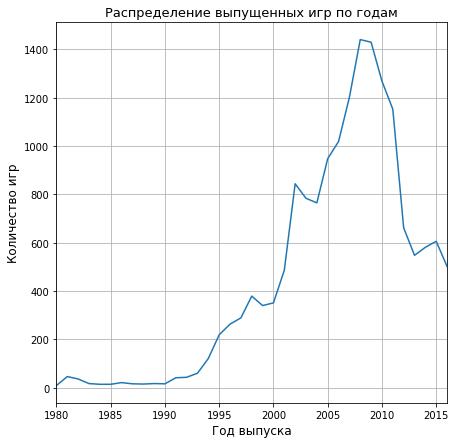

In [37]:
game_year_of_release['name'].plot(grid=True,figsize=(7,7))
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.title('Распределение выпущенных игр по годам', fontsize=13)

**Вывод**

На графике видно, что начиная с 1994 года количество выпускаемых игр с каждым годом значительно увеличивалось и достигло максимального значения в 2008 году - 1441 выпущенная игра за год. С 2009 года количество ежегодно выпускаемых игр начало снижаться. Очевидно, что большое количество выпущенных за 2008 год игр свидетельствует о значительной популярности компьютерных игр в целом. Данные по выпуску игр за все периоды не важны, поскольку прогресс не стоит на месте и с каждым годом выпускаются все более интересные и освершенные игры, и найдется не так много пользователей, кто захочет купить игру более раннего года выпуска. 

### Анализ продаж по платформам. Выбор платформ с наибольшими суммарными продажами и построение распределений по годам

Найдем платформы с наибольшими суммарными продажами:

In [38]:
platform_sales = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)
platform_sales.head(10)

,total_sales
platform,
ps2,1247.16
x360,966.61
ps3,935.19
wii,903.31
ds,804.28
ps,727.58
ps4,314.14
gba,313.73
psp,293.57


Text(0, 0.5, 'Количество продаж, млн.')

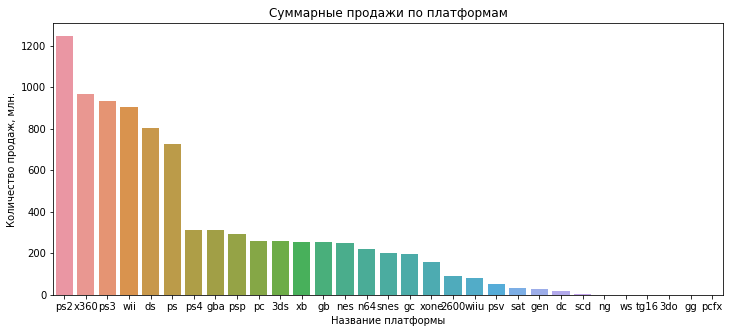

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Суммарные продажи по платформам")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж, млн.")

Из гистограммы видно, что за весь период наибольшие продажи игр составили по платформам: PS2, X360, PS3, WII, DS, PS.

Для топ 6 платформ построим графики распределения выпуска игр по годам:

In [40]:
top_6_platform = df.query('platform == ["ps2", "x360", "ps3", "wii", "ds", "ps"]')
top_6_platform.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4343,singstar take that,ps2,2009,misc,0.00,0.06,0.00,0.39,0.0,0.0,NaN,0.45
939,chrono cross,ps,1999,role-playing,0.62,0.42,0.69,0.12,94.0,8.1,T,1.85
15111,kensei: sacred fist,ps,1997,fighting,0.01,0.01,0.00,0.00,0.0,0.0,NaN,0.02
13665,fifa soccer 2003 (weekly jp sales),ps2,2002,sports,0.00,0.00,0.04,0.00,0.0,0.0,NaN,0.04
10950,let's ride! silver buckle stables,ps2,2006,sports,0.05,0.04,0.00,0.01,0.0,7.8,E,0.10


In [41]:
top_6_platform_name = top_6_platform['platform'].unique()
top_6_platform_name

array(['wii', 'ds', 'x360', 'ps3', 'ps2', 'ps'], dtype=object)

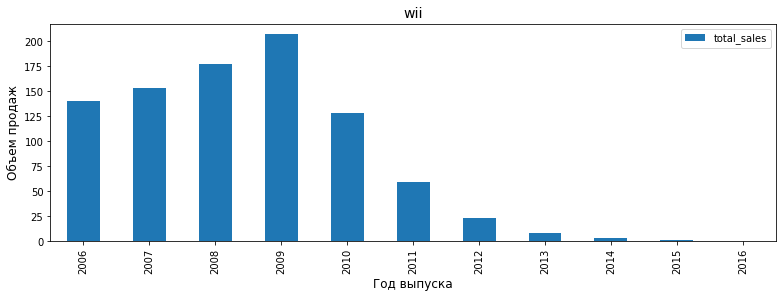

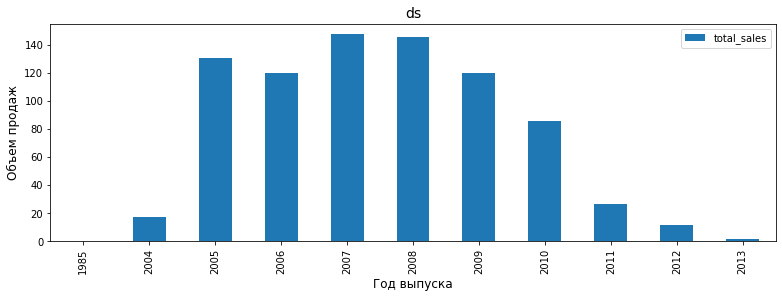

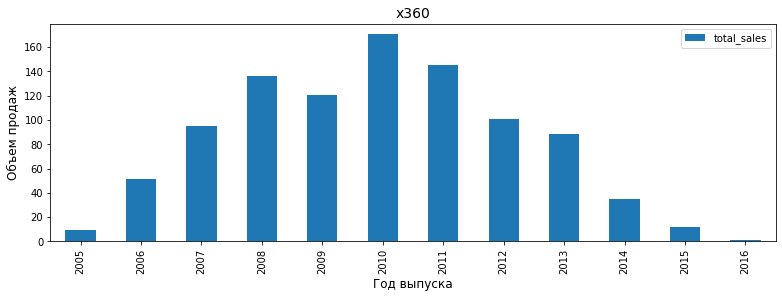

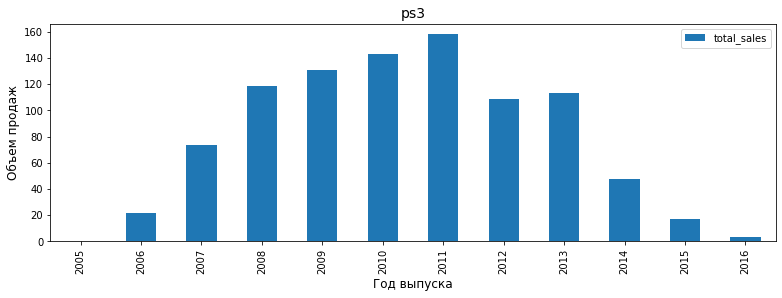

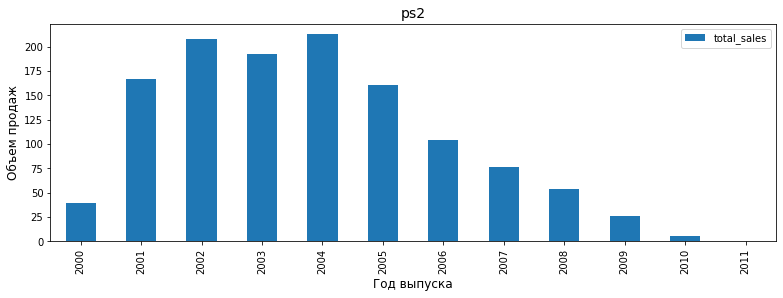

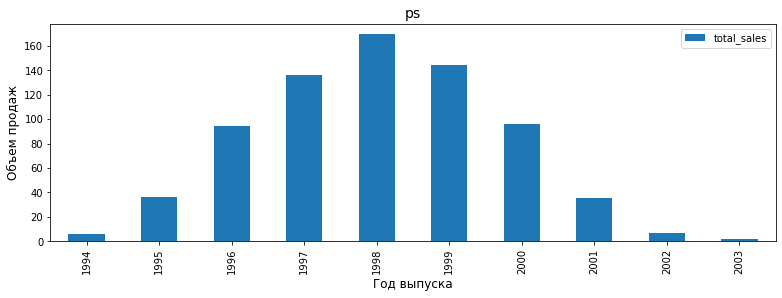

In [42]:
for platform in top_6_platform_name:
    top_6_platform[top_6_platform['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.xlabel('Год выпуска', fontsize=12)
    plt.ylabel('Объем продаж', fontsize=12)
    plt.title(platform, fontsize=14)
plt.show()

Из построенных гистограмм по 6 самым популярным платформам за все время видно:
1. средний срок появления новых платформ и исчезновения старых составляет около 10 лет;
2. максимум продаж по платформе приходится в среднем на 4-5 год после выхода платформы.

### Определение актуального периода данных для построения прогноза

С учетом, что средний срок жизни платформы составляет 10 лет, а максимум продаж приходится на 4-5 год выхода платформы, определим актуальный период - в выборку должны быть включены платформы и выпущенные игры не старше 2012 года. Далее, по построенным графикам распределения для игр, выпущенных после 2012 года, определим актуальные платформы на начало 2017 года.

In [43]:
df_actual = df.query('year_of_release >= 2012')
df_actual.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4494,lego batman 3: beyond gotham,xone,2014,action,0.23,0.17,0.00,0.04,74.0,7.1,E10+,0.44
13312,detective conan: marionette symphony,3ds,2013,adventure,0.00,0.00,0.05,0.00,0.0,0.0,NaN,0.05
10554,football manager 2014,psv,2013,sports,0.00,0.08,0.00,0.02,85.0,5.5,NaN,0.10
6113,divinity: original sin,ps4,2015,role-playing,0.10,0.12,0.02,0.04,87.0,8.7,NaN,0.28
11453,pretty rhythm rainbow live: kira kira my * design,3ds,2013,misc,0.00,0.00,0.08,0.00,0.0,0.0,NaN,0.08
12813,caligula,psv,2016,role-playing,0.00,0.00,0.06,0.00,0.0,0.0,NaN,0.06
15231,monster high 13 wishes,wiiu,2013,action,0.02,0.00,0.00,0.00,0.0,5.5,E,0.02
4877,armored core v,ps3,2012,simulation,0.09,0.04,0.24,0.02,65.0,7.3,T,0.39
907,diablo iii,ps3,2013,role-playing,0.72,0.75,0.15,0.29,86.0,6.4,M,1.91
11294,toukiden 2,ps4,2016,action,0.00,0.00,0.08,0.00,0.0,0.0,NaN,0.08


In [44]:
df_actual.describe(include = ['O'])

,name,platform,genre,rating
count,2899,2899,2899,1623
unique,1671,11,12,4
top,fifa 14,ps3,action,M
freq,9,494,1041,503


Определим самые популярные платформы для игр, выпущенных в 2012 году и позднее:

In [45]:
platform_actual_sales = df_actual.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)
platform_actual_sales.head(15)

,total_sales
platform,
ps4,314.14
ps3,289.71
x360,237.52
3ds,195.01
xone,159.32
wiiu,82.19
pc,63.51
psv,49.18
wii,36.60


Построим графики распределения выпуска игр по платформам за актуальный период:

In [46]:
platform_actual_name = df_actual['platform'].unique()
platform_actual_name

array(['ps3', 'x360', 'ps4', '3ds', 'ds', 'xone', 'wiiu', 'wii', 'pc',
       'psv', 'psp'], dtype=object)

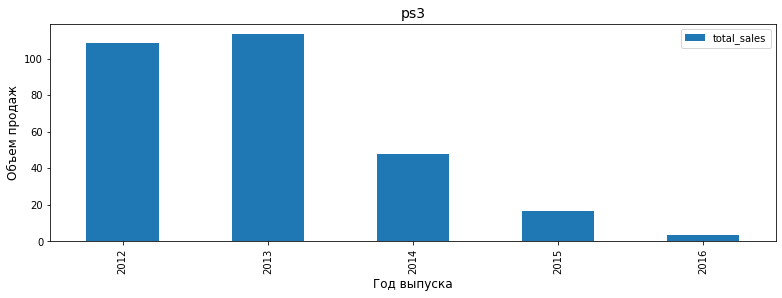

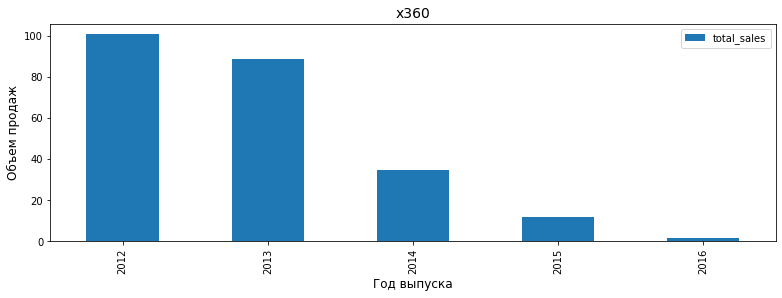

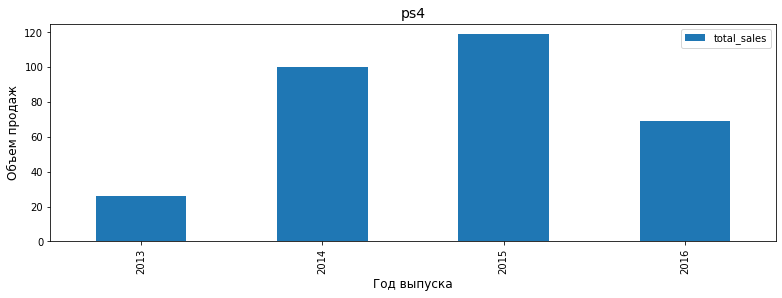

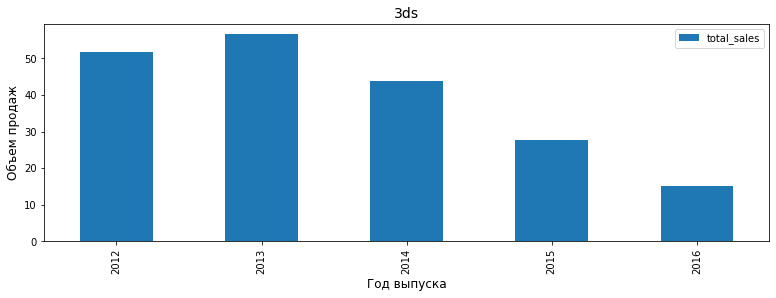

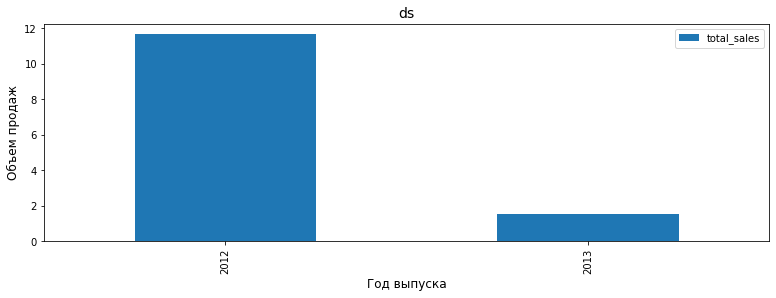

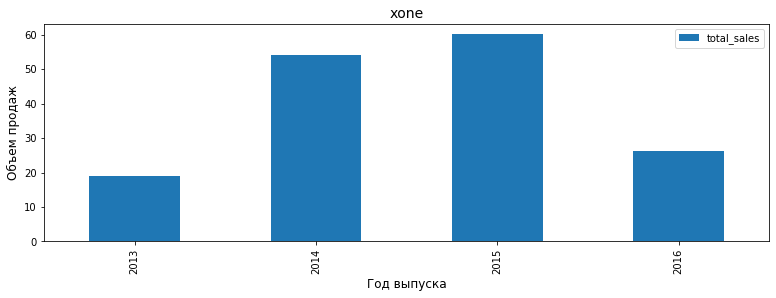

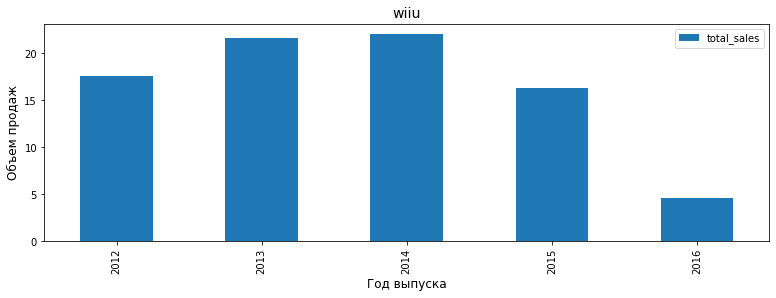

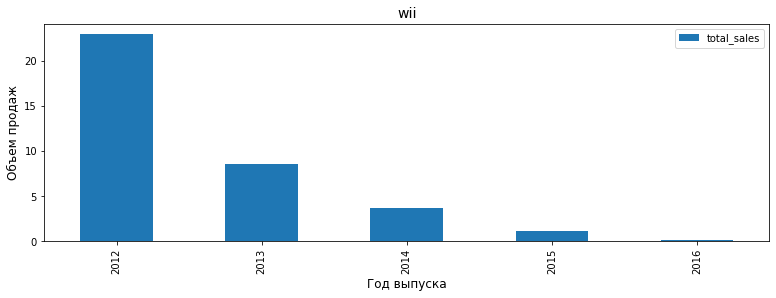

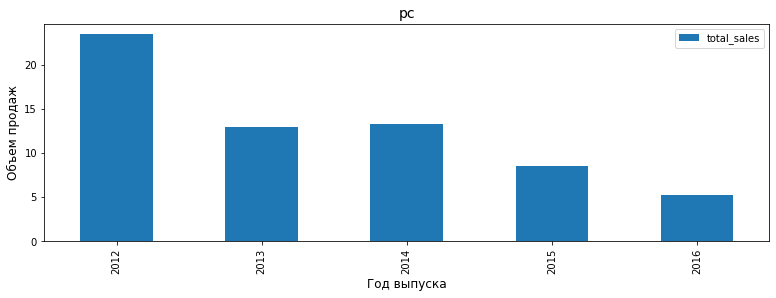

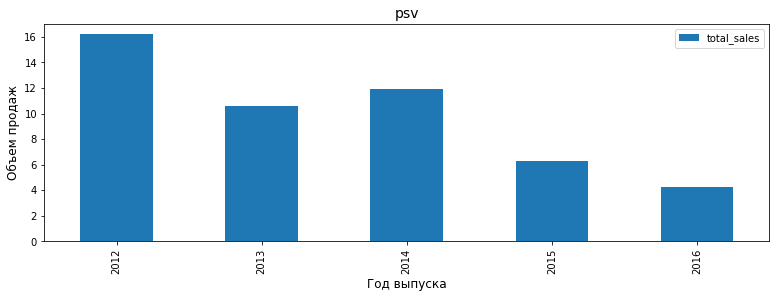

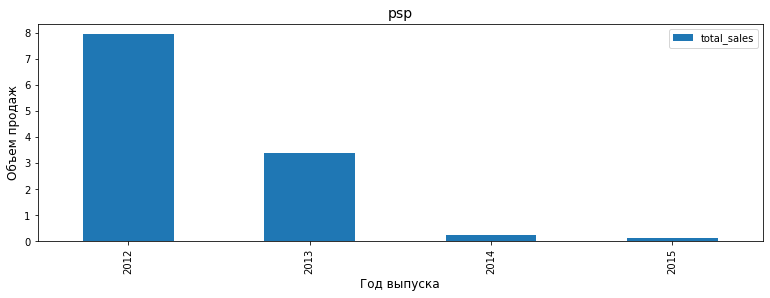

In [47]:
for platform in platform_actual_name:
    df_actual[df_actual['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.xlabel('Год выпуска', fontsize=12)
    plt.ylabel('Объем продаж', fontsize=12)
    plt.title(platform, fontsize=14)
plt.show()

Из построенных графиков распределения видно, что продажи игр по некоторым платформам к 2016 году совсем упали (ps3, x360, ds, wii, psp), а это означает, что для построения прогноза на 2017 год их учитывать уже не стоит. Сформируем итоговую выборку по платформам:

In [48]:
platform_actual = df.query('platform == ["ps4", "3ds", "xone", "wiiu", "pc", "psv"]')
platform_actual = platform_actual.reset_index(drop = True)
platform_actual.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2614,ride 2,pc,2016,racing,0.00,0.01,0.00,0.00,78.0,7.9,E,0.01
957,transformers: prime,3ds,2012,action,0.13,0.02,0.00,0.02,0.0,0.0,NaN,0.17
1653,minna no ennichi,3ds,2012,action,0.00,0.00,0.05,0.00,0.0,0.0,NaN,0.05
1729,shin kamaitachi no yoru: 11 hitome no suspect,psv,2011,adventure,0.00,0.00,0.05,0.00,0.0,0.0,NaN,0.05
1750,atelier escha & logy: alchemists of the dusk sky,psv,2015,role-playing,0.00,0.00,0.05,0.00,0.0,0.0,NaN,0.05
1599,the amazing spider-man 2 (2014),wiiu,2014,action,0.03,0.02,0.00,0.00,0.0,0.0,NaN,0.05
1804,blood bowl,pc,2009,sports,0.02,0.02,0.00,0.00,72.0,6.5,T,0.04
1835,csi: fatal conspiracy,pc,2010,adventure,0.00,0.03,0.00,0.01,47.0,5.5,M,0.04
226,hyrule warriors,wiiu,2014,action,0.58,0.42,0.13,0.10,76.0,8.3,T,1.23
1755,world trigger: borderless mission,psv,2015,action,0.00,0.00,0.04,0.00,0.0,0.0,NaN,0.04


In [49]:
platform_actual.describe(include = ['O'])

,name,platform,genre,rating
count,2700,2700,2700,1690
unique,2132,6,12,7
top,lego batman 3: beyond gotham,pc,action,T
freq,6,970,800,548


**Вывод**

По построенным графикам определим платформы, продажи игр по которым падают в период с 2012 по 2016 год - на начало 2017 года данные платформы будут уже не актуальны и их нужно исключить из выборки для построения прогноза:
1. ps3 
2. x360 
3. ds 
4. wii 
5. psp

Платформы, продажи игр по которым растут в период с 2012 по 2016 год:
1. ps4
2. xone
3. wiiu
4. psv

с учетом года выпуска и ожидания, что максимальный объем продаж по платформе приходится на 5 год выпуска, под критерий потенциально прибыльных платформ попадают:
1. ps4
2. xone

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

Построим графики типа "ящик с усами" для 6 наиболее популярных платформ по глобальным продажам:

In [50]:
platform_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,515.0,0.502000,1.437252,0.01,0.05,0.12,0.335,14.60
pc,970.0,0.266866,0.676858,0.01,0.02,0.05,0.170,8.01
ps4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
psv,429.0,0.125431,0.212341,0.01,0.02,0.05,0.130,1.96
wiiu,147.0,0.559116,1.058836,0.01,0.08,0.22,0.525,7.09
xone,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


Text(0, 0.5, 'Объем продаж, млн. копий')

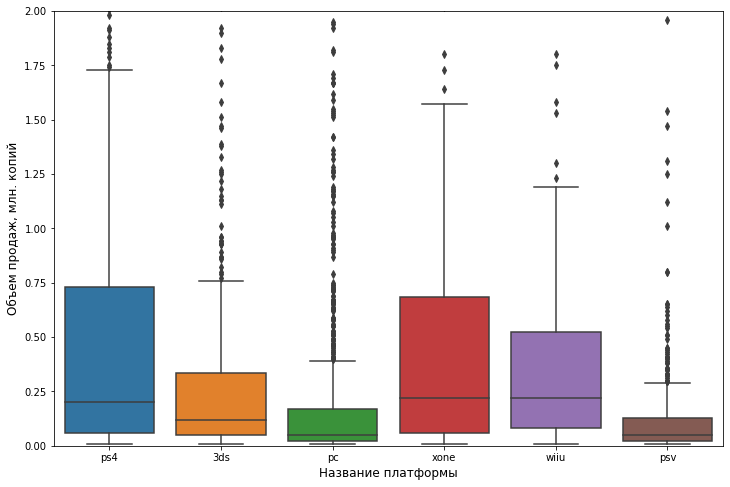

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=platform_actual)
plt.ylim(0, 2)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Объем продаж, млн. копий', fontsize=12)

**Вывод**

На построенных графиках хорошо видно наличие большого количества выбросов, поэтому средний объем продаж будет корректнее оценить по медиане.

Средний объем продаж игры по платформам различается и составляет от 0,05 млн. копий игры до 0,22 млн. копий.

На основании средних значений можно выделить 3 самые популярные платформы: xone, wiiu, ps4.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. Построение диаграммы рассеяния и расчет корреляции между отзывами и продажами

Построим диаграммы рассеяния и рассчитаем корреляцию между отзывами и продажами для самой популярной платформы по глобальным продажам - ps2: 

In [52]:
ps4_sales = platform_actual.query('platform == "ps4" and user_score > 0.0 and critic_score > 0.0')

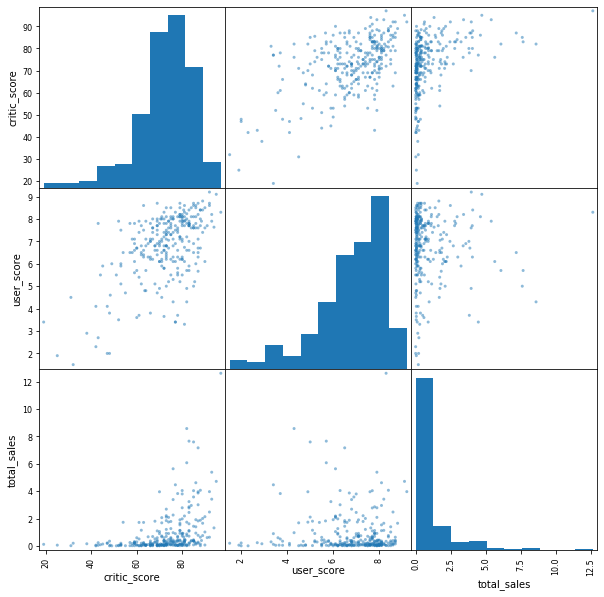

In [53]:
axes = pd.plotting.scatter_matrix(ps4_sales[['critic_score', 'user_score', 'total_sales']], figsize = (10, 10))

In [54]:
ps4_sales[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.559552,0.39069
user_score,0.559552,1.000000,-0.01950
total_sales,0.390690,-0.019500,1.00000


**Вывод**

Корреляция 0.39 между отзывами критиков и продажами игр говорит о наличии связи, но не очень сильной. Выходит, на увеличение роста продаж игр ps4 могли влиять отзывы критиков, но не всегда.

Корреляция -0.019 между отзывами пользователей и продажами игр говорит об отсутствии связи между этими двумя параметрами.

### Соотнесение выводов с продажами игр на других платформах

Рассмотрим корреляции для остальных актульных платформ (3ds, xone, wiiu, pc, psv):

для 3ds:

In [55]:
ds3_sales = platform_actual.query('platform == "3ds" and user_score > 0.0 and critic_score > 0.0')

In [56]:
print('Корреляция между отзывами критиков и продажами:', ds3_sales['critic_score'].corr(ds3_sales['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', ds3_sales['user_score'].corr(ds3_sales['total_sales']))

Корреляция между отзывами критиков и продажами: 0.31334782184810145
Корреляция между отзывами пользователей и продажами: 0.22009735674242398


для xone:

In [57]:
xone_sales = platform_actual.query('platform == "xone" and user_score > 0.0 and critic_score > 0.0')

In [58]:
print('Корреляция между отзывами критиков и продажами:', xone_sales['critic_score'].corr(xone_sales['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', xone_sales['user_score'].corr(xone_sales['total_sales']))

Корреляция между отзывами критиков и продажами: 0.37038999577440845
Корреляция между отзывами пользователей и продажами: -0.0910746906604973


для wiiu:

In [59]:
wiiu_sales = platform_actual.query('platform == "wiiu" and user_score > 0.0 and critic_score > 0.0')

In [60]:
print('Корреляция между отзывами критиков и продажами:', wiiu_sales['critic_score'].corr(wiiu_sales['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', wiiu_sales['user_score'].corr(wiiu_sales['total_sales']))

Корреляция между отзывами критиков и продажами: 0.3288064056843301
Корреляция между отзывами пользователей и продажами: 0.375837361022699


для pc:

In [61]:
pc_sales = platform_actual.query('platform == "pc" and user_score > 0.0 and critic_score > 0.0')

In [62]:
print('Корреляция между отзывами критиков и продажами:', pc_sales['critic_score'].corr(pc_sales['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', pc_sales['user_score'].corr(pc_sales['total_sales']))

Корреляция между отзывами критиков и продажами: 0.22884233444458582
Корреляция между отзывами пользователей и продажами: -0.006050396477817481


для psv:

In [63]:
psv_sales = platform_actual.query('platform == "psv" and user_score > 0.0 and critic_score > 0.0')

In [64]:
print('Корреляция между отзывами критиков и продажами:', psv_sales['critic_score'].corr(psv_sales['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', psv_sales['user_score'].corr(psv_sales['total_sales']))

Корреляция между отзывами критиков и продажами: 0.14249645686904286
Корреляция между отзывами пользователей и продажами: 0.011477251076856723


**Вывод**

В целом, для всех актуальных платформ по объему глобальных продах сохраняется схожая тенденция - наличие слабой корреляции между отзывами критиков и отсутстствие особой связи между отзывами пользователей и продажами. Исключение составляют только игры для портативных консолей 3ds и wiiu, где также прослеживается слабая корреляция между отзывами пользователей и продажами.

Таким образом, пользовыатели при выборе игр ориентируются на свои собственные вкусы и предпочтения, прислушиваются к отзывам профессиональных критиков и обычно не принимают в расчет отзывы других пользователей.

### Общее распределение игр по жанрам: самые прибыльные жанры, жанры с высокими и низкими продажами

In [65]:
genre_group = platform_actual.groupby('genre')['genre'].count()
genres = genre_group.index

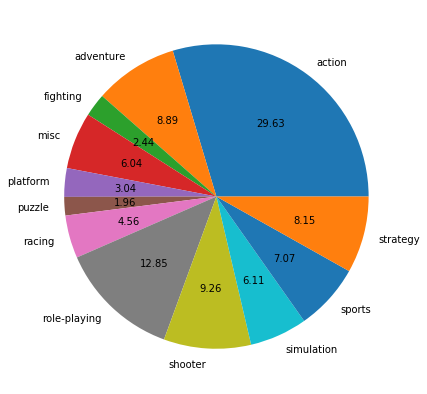

In [66]:
plt.figure(figsize=(20,7))
plt.pie(genre_group, labels=genres, autopct="%.2f")
plt.show()

Самые прибыльные жанры и жанры с самими низкими продажами:

In [67]:
platform_actual.groupby('genre')['total_sales'].sum().sort_values(ascending = False).reset_index()

,genre,total_sales
0,action,259.30
1,shooter,205.78
2,role-playing,186.03
3,sports,107.84
4,simulation,81.97
5,platform,65.70
6,misc,52.03
7,racing,51.01
8,strategy,50.47
9,fighting,30.84


**Вывод**

Среди всех жанров по популярности значительно выделяется action, на втором месте представлен жанр role-playing. 

По продажам ситуация немного иная, хотя лидер прежний - самые прибыльные жанры action, shooter и role-playing. Наименее прибыльные - puzzle, adventure и fighting.

## Шаг 4. Составление портрета пользователя каждого региона

### Самые популярные платформы по регионам (топ-5)

In [68]:
na_top_platform = platform_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False).head(5)
na_top_platform

,na_sales
platform,
ps4,108.74
pc,94.23
xone,93.12
3ds,83.11
wiiu,38.10


In [69]:
eu_top_platform = platform_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head(5)
eu_top_platform

,eu_sales
platform,
pc,142.16
ps4,141.09
3ds,61.46
xone,51.59
wiiu,25.13


In [70]:
jp_top_platform = platform_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head(5)
jp_top_platform

,jp_sales
platform,
3ds,100.64
psv,21.84
ps4,15.96
wiiu,13.01
xone,0.34


Используем функцию для построения графиков:

In [71]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = platform_actual.pivot_table(index = groupby, values = region_sales, aggfunc = 'sum').sort_values(region_sales, ascending = False).head(5)
    title = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    plot = pivot.plot(kind='bar', figsize=(15,6), title=title[region_sales], fontsize=12, ax=axes[ax])
    plot.legend(prop={'size':11})
    plot.set_xlabel('')
    plot.set_ylabel('Объем продаж').set_size(12)
    plot.title.set_size(15)

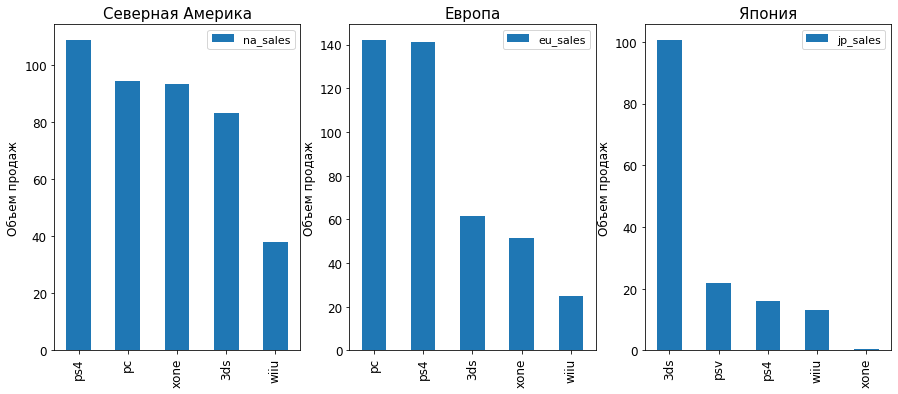

In [72]:
fig, axes = plt.subplots(1, 3)

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

### Самые популярные жанры по регионам (топ-5)

In [73]:
na_top_genre = platform_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False).head(5)
na_top_genre

,na_sales
genre,
action,97.57
shooter,92.77
role-playing,59.54
sports,40.06
simulation,28.16


In [74]:
eu_top_genre = platform_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head(5)
eu_top_genre

,eu_sales
genre,
action,97.55
shooter,83.37
role-playing,57.87
sports,49.39
simulation,37.56


In [75]:
jp_top_genre = platform_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head(5)
jp_top_genre

,jp_sales
genre,
role-playing,54.19
action,36.54
platform,10.71
misc,10.70
simulation,10.64


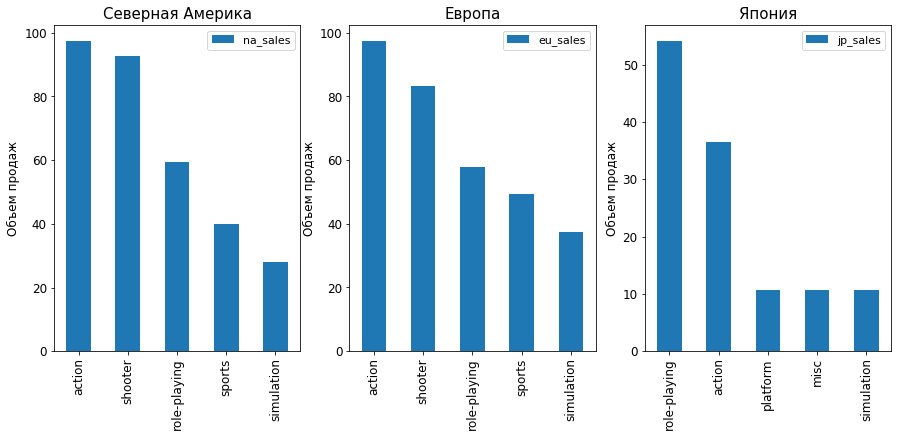

In [76]:
fig, axes = plt.subplots(1, 3)

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

### Влияние рейтинга ESRB на продажи в отдельном регионе

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»

In [77]:
na_top_rating = platform_actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_top_rating

,na_sales
rating,
M,123.25
E,88.31
T,72.15
E10+,46.48
K-A,2.30
EC,0.09
RP,0.00


In [78]:
eu_top_rating = platform_actual.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_top_rating

,eu_sales
rating,
M,131.10
E,88.80
T,79.54
E10+,37.50
K-A,0.11
RP,0.04
EC,0.00


In [79]:
jp_top_rating = platform_actual.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_top_rating

,jp_sales
rating,
E,29.76
T,16.50
M,9.45
E10+,8.32
EC,0.00
K-A,0.00
RP,0.00


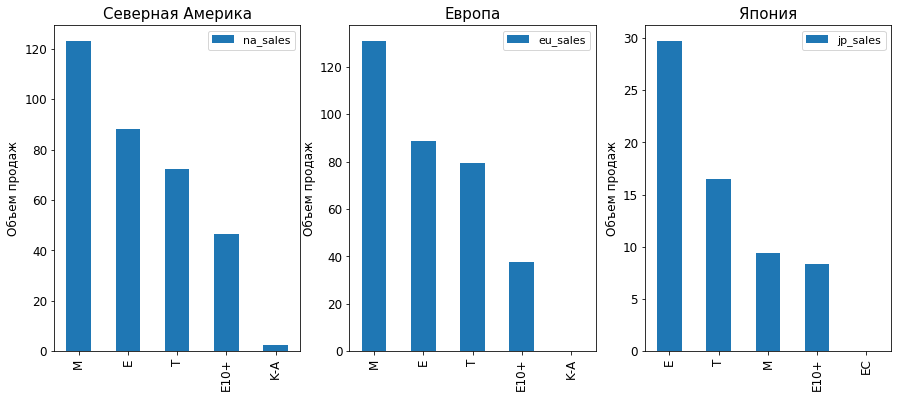

In [80]:
fig, axes = plt.subplots(1, 3)

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

**Вывод**

Портрет пользователя в Северной Америке:
1.	Самые популярные платформы – ps4, pc, xone;
2.	Самые популярные жанры – action, shooter, role-playing;
3.	Самые популярные игры по возрастному рейтингу – M, E, T.

Портрет пользователя в Европе:
1.	Самые популярные платформы – pc, ps4, 3ds;
2.	Самые популярные жанры - action, shooter, role-playing;
3.	Самые популярные игры по возрастному рейтингу – M, E, T.

Портрет пользователя в Японии:
1.	Самые популярные платформы – 3ds, psv, ps4 (пользователи Японии предпочитают карманные консоли, а также консоли японского происхождения – Xbox One совершенно не пользуется популярностью);
2.	Самые популярные жанры - role-playing, action, platform;
3.	Самые популярные игры по возрастному рейтингу – E, T, M (возрастной рейтинг пользователей Японии опять же говорит о их более молодом возрасте по сравнению с пользователями Северной Америки и Европы).

В целом, портреты пользователей в Северной Америке и Европе совпадают. Персональные компьютеры PC в данных регионах не теряют своей актуальности и занимают лидирующие позиции наравне с PS4. Пользователи Японии, в отличие от других регионов, значительно моложе возрастом, о чем свидетельствует популярность портативных консолей, а также возрастной рейтинг популярных игр.

## Шаг 5. Проверка гипотез

### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу **H₀** - cредние пользовательские рейтинги платформы Xbox One равны cредние пользовательские рейтинги платформы PC.
Альтернативная гипотеза **H₁** - cредние пользовательские рейтинги платформы Xbox One и cредние пользовательские рейтинги платформы PC различаются.

Найдем средние пользовательские рейтинги платформ Xbox One и PC, их дисперсии и стандартное отклонение:

In [81]:
df_xone = df.query('platform == "xone"')
df_pc = df.query('platform == "pc"')

In [82]:
xone_user_score_mean = df_xone['user_score'].mean()
xone_user_score_median = df_xone['user_score'].median()
xone_user_score_variance = np.var(df_xone['user_score'])
xone_user_score_standard_dev = np.std(df_xone['user_score'])

print('Средний пользовательский рейтинг платформы Xbox One:', xone_user_score_mean)
print('Медиана пользовательского рейтинга платформы Xbox One:', xone_user_score_median)
print('Дисперсия пользовательского рейтинга платформы Xbox One:', xone_user_score_variance)
print('Стандартное отклонение пользовательского рейтинга платформы Xbox One:', xone_user_score_standard_dev)

Средний пользовательский рейтинг платформы Xbox One: 5.298954116059379
Медиана пользовательского рейтинга платформы Xbox One: 6.3
Дисперсия пользовательского рейтинга платформы Xbox One: 8.317684747332361
Стандартное отклонение пользовательского рейтинга платформы Xbox One: 2.8840396577253165


In [83]:
pc_user_score_mean = df_pc['user_score'].mean()
pc_user_score_median = df_pc['user_score'].median()
pc_user_score_variance = np.var(df_pc['user_score'])
pc_user_score_standard_dev = np.std(df_pc['user_score'])

print('Средний пользовательский рейтинг платформы PC:', pc_user_score_mean)
print('Медиана пользовательского рейтинга платформы PC:', pc_user_score_median)
print('Дисперсия пользовательского рейтинга платформы PC:', pc_user_score_variance)
print('Стандартное отклонение пользовательского рейтинга платформы PC:', pc_user_score_standard_dev)

Средний пользовательский рейтинг платформы PC: 5.714121993127148
Медиана пользовательского рейтинга платформы PC: 7.0
Дисперсия пользовательского рейтинга платформы PC: 9.577101580192133
Стандартное отклонение пользовательского рейтинга платформы PC: 3.0946892542211946


Сформируем выборки с рейтингом пользователей для платформ Xbox One и PC:

In [84]:
xone_user_score = df.query('platform == "xone"')['user_score']
pc_user_score = df.query('platform == "pc"')['user_score']

In [85]:
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.04769786892384884
Отвергаем нулевую гипотезу


**Вывод**

Для выбранного уровня значимости отвергаем нулевую гипотезу. Вывод — cредние пользовательские рейтинги платформы Xbox One и cредние пользовательские рейтинги платформы PC различаются.

### Cредние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую гипотезу **H₀** - cредние пользовательские рейтинги жанра Action равны cредним пользовательским рейтингам жанра Sports.
Альтернативная гипотеза **H₁** - cредние пользовательские рейтинги жанра Action и cредние пользовательские рейтинги жанра Sports различаются.

Найдем средние пользовательские рейтинги жанров Action и Sports, их дисперсии и стандартное отклонение:

In [86]:
df_action = df.query('genre == "action"')
df_sports = df.query('genre == "sports"')

In [87]:
action_user_score_mean = df_action['user_score'].mean()
action_user_score_median = df_action['user_score'].median()
action_user_score_variance = np.var(df_action['user_score'])
action_user_score_standard_dev = np.std(df_action['user_score'])

print('Средний пользовательский рейтинг жанра Action:', action_user_score_mean)
print('Медиана пользовательского рейтинга жанра Action:', action_user_score_median)
print('Дисперсия пользовательского рейтинга жанра Action:', action_user_score_variance)
print('Стандартное отклонение пользовательского рейтинга жанра Action:', action_user_score_standard_dev)

Средний пользовательский рейтинг жанра Action: 4.0647700977458605
Медиана пользовательского рейтинга жанра Action: 5.4
Дисперсия пользовательского рейтинга жанра Action: 13.339451817698182
Стандартное отклонение пользовательского рейтинга жанра Action: 3.65232142858459


In [88]:
sports_user_score_mean = df_sports['user_score'].mean()
sports_user_score_median = df_sports['user_score'].median()
sports_user_score_variance = np.var(df_sports['user_score'])
sports_user_score_standard_dev = np.std(df_sports['user_score'])

print('Средний пользовательский рейтинг жанра Sports:', sports_user_score_mean)
print('Медиана пользовательского рейтинга жанра Sports:', sports_user_score_median)
print('Дисперсия пользовательского рейтинга жанра Sports:', sports_user_score_variance)
print('Стандартное отклонение пользовательского рейтинга жанра Sports:', sports_user_score_standard_dev)

Средний пользовательский рейтинг жанра Sports: 3.391026218031147
Медиана пользовательского рейтинга жанра Sports: 0.0
Дисперсия пользовательского рейтинга жанра Sports: 13.322047925599703
Стандартное отклонение пользовательского рейтинга жанра Sports: 3.6499380714745975


Сформируем выборки с рейтингом пользователей для жанров Action и Sports:

In [89]:
action_user_score = df.query('genre == "action"')['user_score']
sports_user_score = df.query('genre == "sports"')['user_score']

In [90]:
alpha = 0.05

results = st.ttest_ind(action_user_score, sports_user_score, equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  8.860360363167103e-12
Отвергаем нулевую гипотезу


**Вывод**

Для выбранного уровня значимости отвергаем нулевую гипотезу. Вывод — cредние пользовательские рейтинги жанра Action и cредние пользовательские рейтинги жанра Sports различаются.

## Общий вывод

В данной проектной работе для интернет-магазина «Стримчик», продающего компьютерные игры по всему миру, выявлены закономерности, определяющие успешность игры. Выполнены следующие этапы:

1.	Изучение файлов с данными и получение общей информации – на данном этапе выполнена предварительная оценка датасета и намечен объем для дальнейшей работы на этапе подготовки данных.

2.	Выполнена подготовка данных и произведен подсчет суммарных продаж во всех регионах. Названия столбцов таблицы, а также значения в столбцах name, platform и genre приведены к единому нижнему регистру. Восстановлены пропущенные значения в столбцах year_of_release, critic_score, user_score и rating в строках, где возможна логичная замена пропущенных значений. В столбце year_of_release изменен тип данных из float в int; в столбце user_score изменен тип данных с object на float. В столбце с рейтингом рассмотрены значения с аббревиатурой tbd. Датафрейм проверен на наличие дубликатов.

3.	На этапе исследовательского анализа данных определены самые популярные платформы за весь период, а также платформы, актуальные в настоящий момент и перспективные в будущем:

За весь период наибольшие продажи игр составили по платформам: PS2, X360, PS3, WII, DS, PS.

Актуальные и перспективные платформы: PS4, Xbox One, Wii U, PC, PSV, 3DS.

Рассмотрено влияние отзывов пользователей и критиков на продажи игр. Сделан вывод, что пользовыатели при выборе игр ориентируются на свои собственные вкусы и предпочтения, иногда прислушиваются к отзывам профессиональных критиков и обычно не принимают в расчет отзывы других пользователей. 

Самые популярные жанры игр Action, Role-Playing и Shooter. Самые прибыльные жанры по продажам те же – Action, Shooter и Role-Playing, разве по продажам Shooter вышел на второе место. Наименее прибыльные - Puzzle, Adventure и Fighting.

4.	Составлен портрет пользователей по регионам. В целом, портреты пользователей в Северной Америке и Европе совпадают. Персональные компьютеры PC в данных регионах не теряют своей актуальности и занимают лидирующие позиции наравне с PS4. Пользователи Японии, в отличие от других регионов, значительно моложе возрастом, о чем свидетельствует популярность портативных консолей, а также возрастной рейтинг популярных игр.

5.	Проверена гипотеза о равенстве cредних пользовательских рейтингов платформ Xbox One и PC, а также пользовательских рейтингов жанров Action и Sports. Получены выводы о различии cредних пользовательских рейтингов платформ Xbox One и PC, а также различии пользовательских рейтингов жанров Action и Sports для выбранных уровней значимости, равных 0.05.